## Cross_Validation_and_GridSearchCV

The main aim of this project is to explore the concepts of cross_validation and Gridsearchcv.The dataset used is collected from kaggle.Here the target variable is Purchased according to other features.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#importing warnings to suppress when raised in execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the dataset to the dataframe
s=pd.read_csv('SocialNetworkAds.csv')
car=pd.DataFrame(s)

#looking for the data structure
car.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
car.shape

(400, 5)

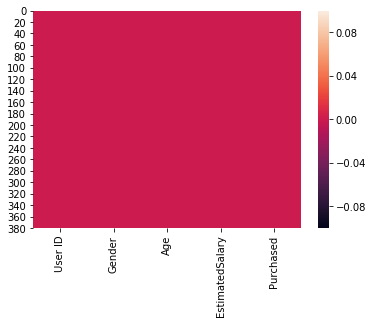

In [4]:
#lets check for null values if any
sns.heatmap(car.isnull())

#There is no null values in the data

In [5]:
#lets drop the user id column as it don't have any relevant data for prediction
car.drop('User ID',axis=1,inplace=True)

In [6]:
#lets see for the datatype of the columns
car.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
#lets convert the gender column to label
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car['Gender']=le.fit_transform(car['Gender'].astype(str))

Data Visualization

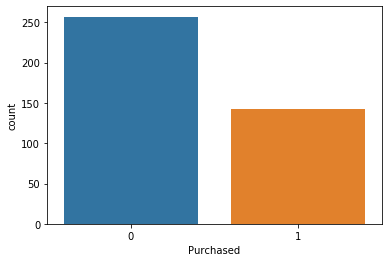

In [8]:
#getting the counts of the car purchased
sns.countplot(car['Purchased'])

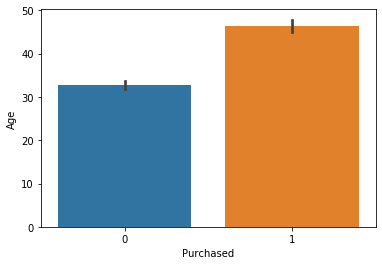

In [9]:
#plotting barplot b/w age and Purchased
sns.barplot(x='Purchased',y='Age',data=car)

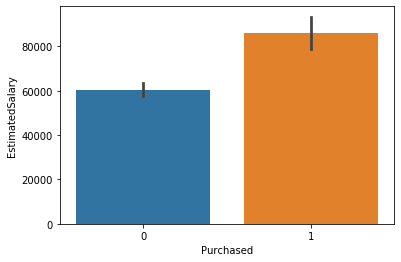

In [10]:
#plotting barplot b/w estimated salry and Purchased
sns.barplot(x='Purchased',y='EstimatedSalary',data=car)

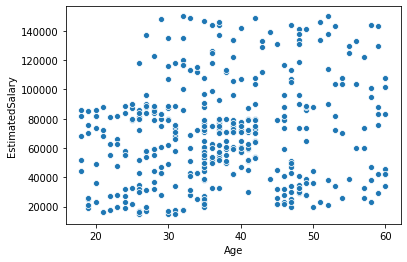

In [11]:
#scatterplot b/w estimated salary and age
sns.scatterplot(x='Age',y='EstimatedSalary',data=car)

Gender                AxesSubplot(0.125,0.536818;0.352273x0.343182)
Age                AxesSubplot(0.547727,0.536818;0.352273x0.343182)
EstimatedSalary          AxesSubplot(0.125,0.125;0.352273x0.343182)
Purchased             AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

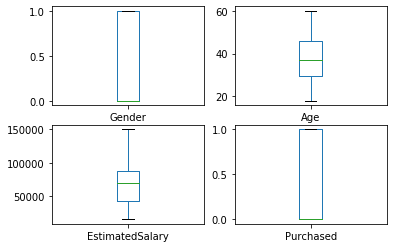

In [12]:
car.plot(kind='box',subplots=True,layout=(2,2))

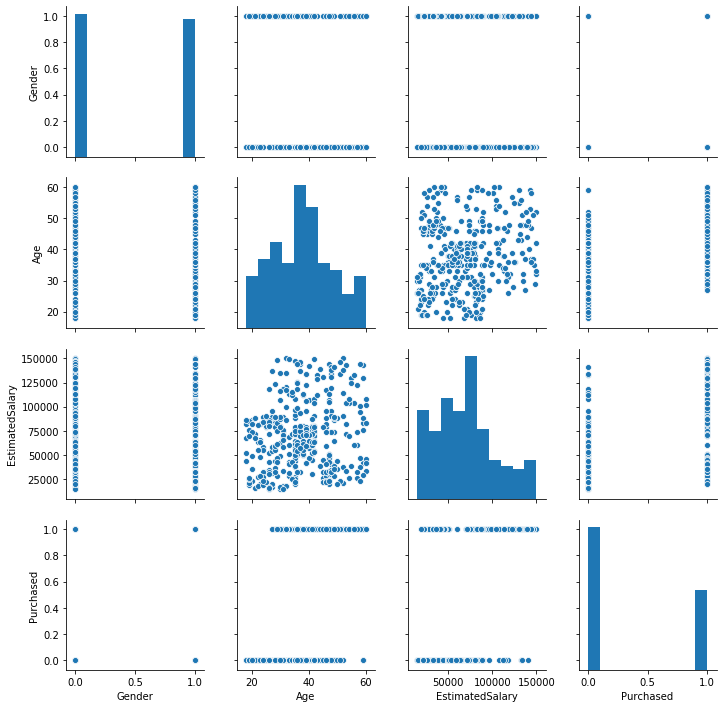

In [13]:
#pairplot
sns.pairplot(car)

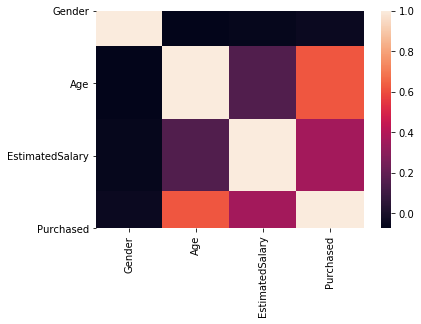

In [14]:
#correlation
carcor=car.corr()
sns.heatmap(carcor)

In [15]:
#getting statistical summary
car.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


There is diifrence in mean and median data in estimated salry column here,lets use boxcox here

In [16]:
from scipy.stats import boxcox
car['EstimatedSalary']=boxcox(car['EstimatedSalary'],0)

shape the data for machine learning

In [17]:
x=car.iloc[:,:-1]
y=car.iloc[:,-1]

In [18]:
#creating function for detrmining  best random state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [19]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [20]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

Applying for algorithm one by one which use GridSearchCV

K-neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [22]:
#lets use gridSearchCV for best n_neighbors
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 24}

In [23]:
knn=KNeighborsClassifier(n_neighbors=24)
random(knn)

0.8863636363636364 at 77


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=77)
model(knn)

score= 0.8134328358208955
0.8863636363636364
[[84  2]
 [13 33]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        86
           1       0.94      0.72      0.81        46

    accuracy                           0.89       132
   macro avg       0.90      0.85      0.87       132
weighted avg       0.89      0.89      0.88       132



In [25]:
cross_val(knn)

[0.80246914 0.86419753 0.85       0.75949367 0.92405063]
mean_score= 0.840042194092827
standard deviation 0.055928267067441015


Support Vector Classifier

In [26]:
from sklearn.svm import SVC
svm=SVC()

#lets get the best kernel using gridsearchcv
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [27]:
svm=SVC(kernel='rbf')
random(svm)

0.9166666666666666 at 77


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=77)
model(svm)

score= 0.8619402985074627
0.9166666666666666
[[83  3]
 [ 8 38]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        86
           1       0.93      0.83      0.87        46

    accuracy                           0.92       132
   macro avg       0.92      0.90      0.91       132
weighted avg       0.92      0.92      0.92       132



In [29]:
cross_val(svm)

[0.81481481 0.87654321 0.8625     0.7721519  0.83544304]
mean_score= 0.8322905922800438
standard deviation 0.03688605604346465


Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rf,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 100}

In [31]:
rf=RandomForestClassifier(n_estimators=100)
random(rf)

0.9318181818181818 at 54


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=54)
model(rf)

score= 1.0
0.9318181818181818
[[84  3]
 [ 6 39]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        87
           1       0.93      0.87      0.90        45

    accuracy                           0.93       132
   macro avg       0.93      0.92      0.92       132
weighted avg       0.93      0.93      0.93       132



In [33]:
cross_val(rf)

[0.81481481 0.9382716  0.8625     0.83544304 0.82278481]
mean_score= 0.8547628535708703
standard deviation 0.04477783230005441


Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'learning_rate':[1,0.1,0.01,0.001],'n_estimators':[10,100,500,1000]}
grid=GridSearchCV(gbc,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [35]:
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=10)
random(gbc)

0.946969696969697 at 58


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=58)
model(rf)

score= 0.996268656716418
0.9166666666666666
[[81  2]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        83
           1       0.95      0.82      0.88        49

    accuracy                           0.92       132
   macro avg       0.93      0.90      0.91       132
weighted avg       0.92      0.92      0.92       132



In [37]:
cross_val(gbc)

[0.75308642 0.9382716  0.925      0.81012658 0.93670886]
mean_score= 0.8726386935458665
standard deviation 0.07662229704510165


In [38]:
#we have the best score from gradient boosting classifier,so saving the model on reference of that
from sklearn.externals import joblib
joblib.dump(gbc,'gbc_crossval_gridsearch.pkl')

['gbc_crossval_gridsearch.pkl']

## Conclusion

As we have to solve the concepts of cross_val_score and GridsearchCV,I have used only those algorithms which need these to find the best estimators values or kernels.